In [88]:
!pip install playsound

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import wave
from playsound import playsound

### Question 1

##### a) Sampling

In [90]:
def sampling(audio_name, sample_rate):
  OG_audio = wave.open(audio_name, "r")

  audio = OG_audio.readframes(-1)

  f_s = OG_audio.getframerate()

  OG_audio.close()

  audio_name = str(sample_rate) + "_" + str(audio_name)
  new_audio = wave.open(audio_name, "w")
  new_audio.setnchannels(1)
  new_audio.setsampwidth(1)
  new_audio.setframerate(sample_rate * f_s)
  new_audio.writeframes(audio)
  # playsound(new_audio)
  new_audio.close()

In [91]:
audio_files = ["alarm.wav", "armageddon.wav", "cry.wav", "wow.wav"]

for i in audio_files:
  sampling(i, 0.25)
  sampling(i, 0.5)
  sampling(i, 2.0)

In [92]:
print("On listening to the original and the reconstructed files, it becomes apparent that the duration of the audio files change beased on the sampling frequency. The higher the sampling frequency, the shorter the file. Moreover, the kind of reconstruction we're doing in this example is basically changing the entire frequency sample instead of just sampling it.")

On listening to the original and the reconstructed files, it becomes apparent that the duration of the audio files change beased on the sampling frequency. The higher the sampling frequency, the shorter the file. Moreover, the kind of reconstruction we're doing in this example is basically changing the entire frequency sample instead of just sampling it.


##### b) DTFT

In [93]:
# function to calculate DTFT of a given signal
def DTFT(audio, sampling_rate):
  # extracting 20 ms
  audio = audio[0:int(sampling_rate * 0.02)]
  n = audio.size

  samples = 100
  omega = np.linspace(-np.pi, np.pi, samples)
  X = np.zeros(samples, dtype=complex)
  for w in range(samples):
    wn = omega[w] * (np.arange(n))
    real = (audio * np.cos(wn)).sum()
    imag = (audio * np.sin(wn)).sum()

    # X(e^-j*omega[w]) = SUM(x * cos(omega[w])) - j *  SUM(x * sin(omega[w])) = A - jB
    X[w] = real - imag * np.array([1j])

  magnitude = np.sqrt((X.real)*(X.real) + (X.imag)*(X.imag))
  phase = np.angle(X)

  return magnitude, phase, omega

In [94]:
#function to plot the magnitude and phase plots of each sampled signal
def plot_DTFT(audio):
  sampling_rates = np.array([0.25, 0.5, 1, 2])
  colours = ['xkcd:moss green', 'xkcd:gold', 'o', 'xkcd:orange']

  plots, graph = plt.subplots(2, 4, figsize=(20, 10))

  plots.suptitle(audio)

  for i in range(sampling_rates.size):

    if sampling_rates[i] != 1:
      read_audio = wave.open(str(sampling_rates[i]) + "_" + audio, "r")
    else:
      read_audio = wave.open(audio, "r")

    audio_file = read_audio.readframes(-1)
    audio_file = np.frombuffer(audio_file, dtype=np.uint8)
    

    framerate = read_audio.getframerate()
    magnitude, phase, omega = DTFT(audio_file, framerate)
    # magnitude
    graph[0, i].set_title('f_s = ' + str(sampling_rates[i]))
    graph[0, i].set(xlabel='Omega', ylabel='Magnitude')
    graph[0, i].stem(omega, magnitude, colours[i], use_line_collection = True) 
    # phase
    graph[1, i].set_title('f_s = ' + str(sampling_rates[i]))
    graph[1, i].set(xlabel='Omega', ylabel='Phase')
    graph[1, i].stem(omega, phase, colours[i], use_line_collection = True)

    read_audio.close()

  plots.tight_layout()

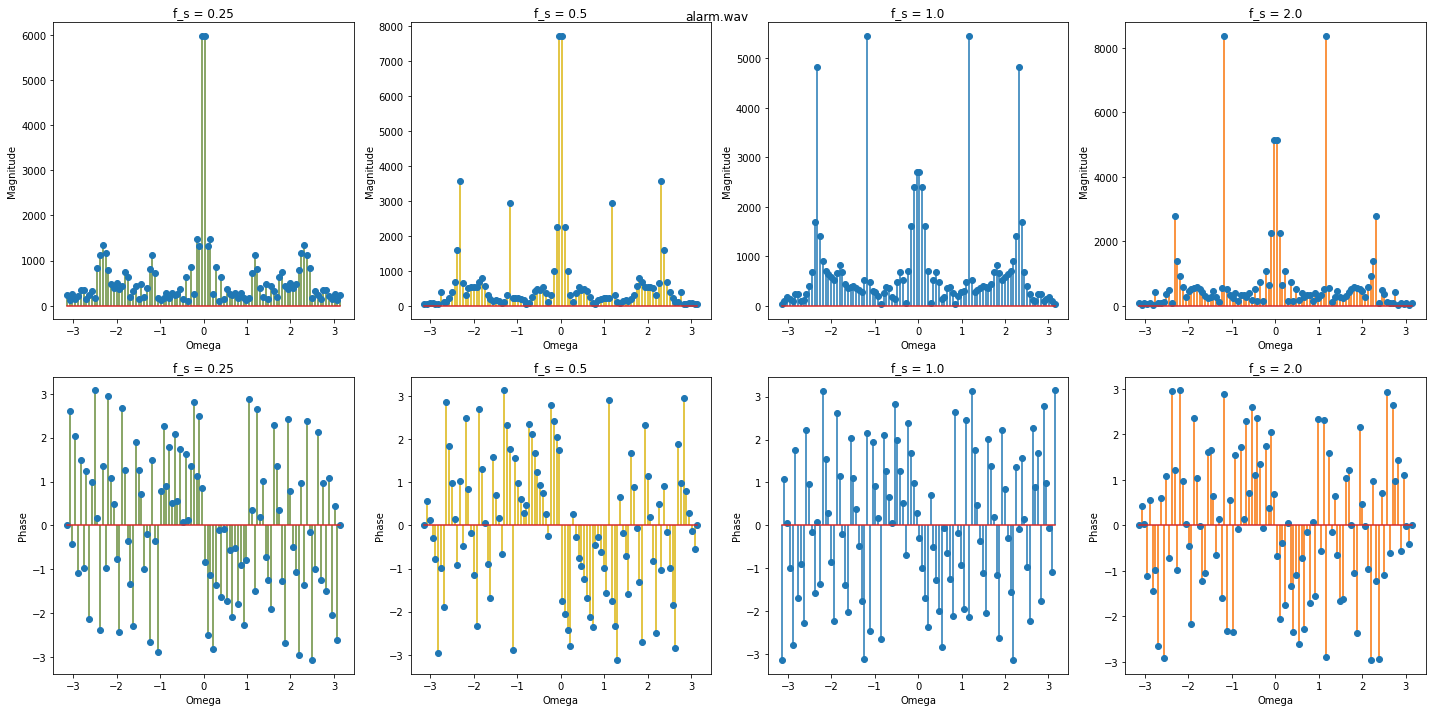

In [95]:
plot_DTFT("alarm.wav")

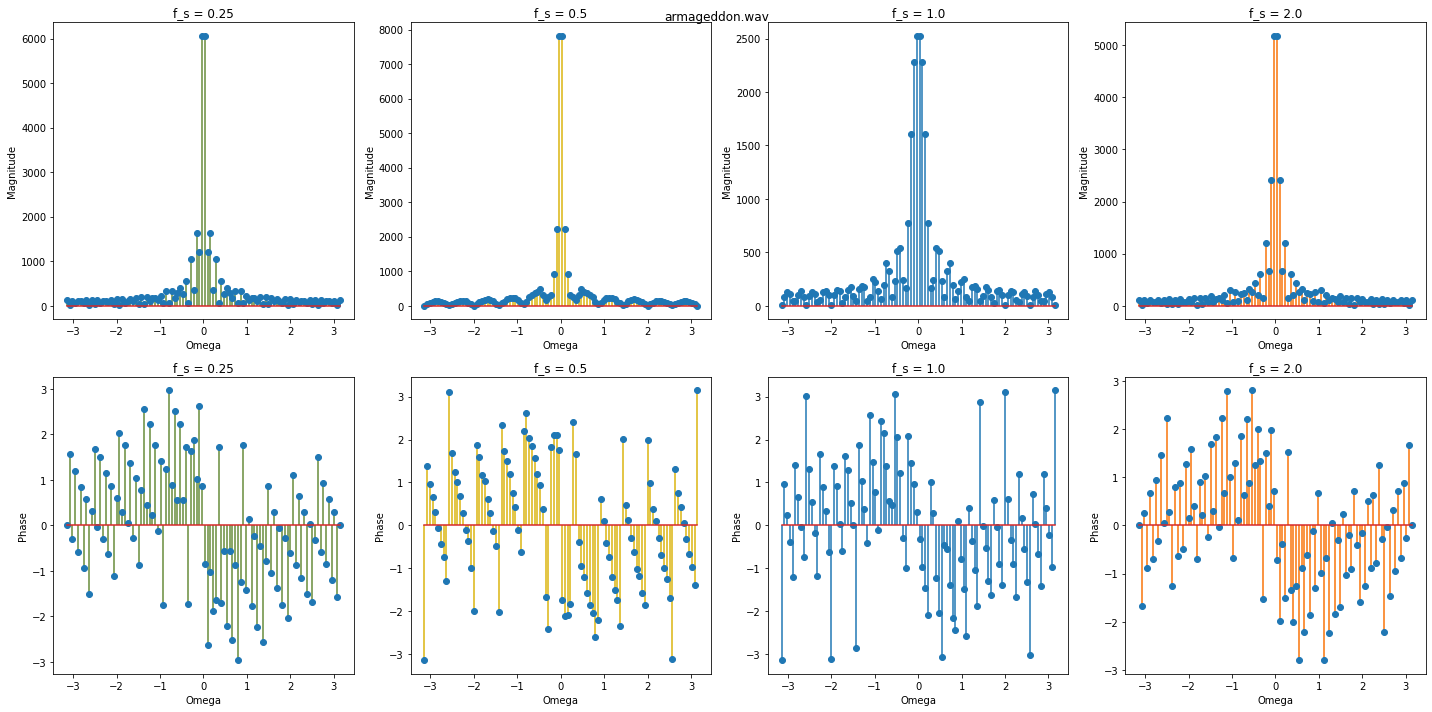

In [96]:
plot_DTFT("armageddon.wav")

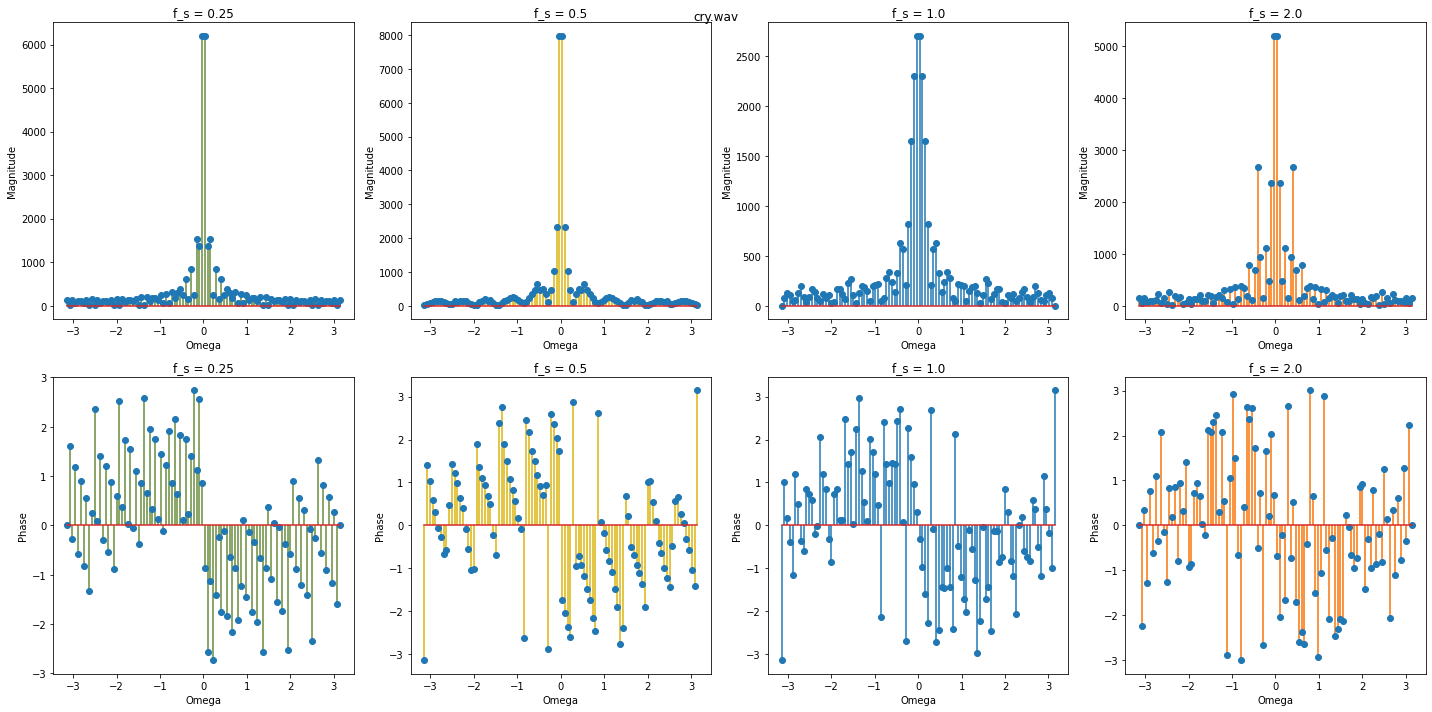

In [97]:
plot_DTFT("cry.wav")

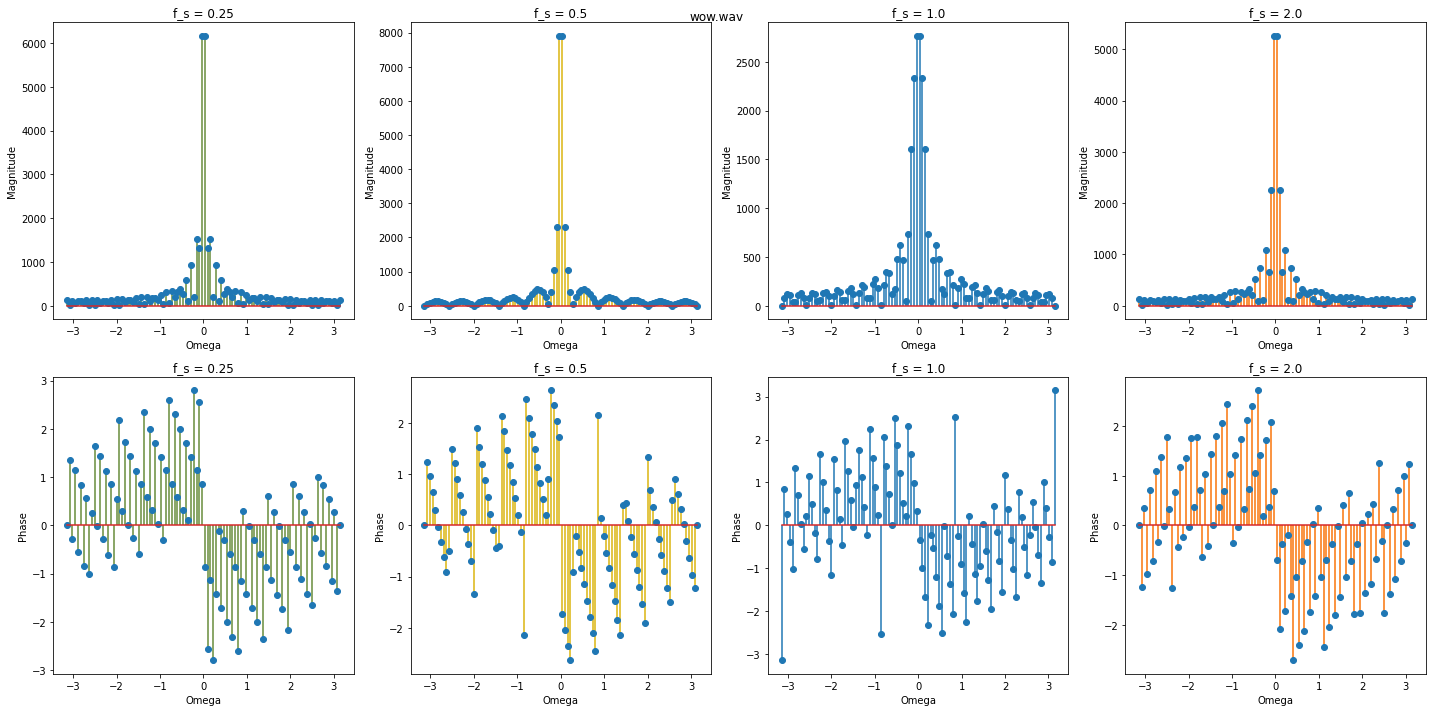

In [98]:
plot_DTFT("wow.wav")

In [99]:
print("From the above plots, it's clear that the number of samples in the DTFT change with each sampling frequency. Moreover, the prominent frequencies in each signal changes.")

From the above plots, it's clear that the number of samples in the DTFT change with each sampling frequency. Moreover, the prominent frequencies in each signal changes.


##### c) Nyquist
For this example, let's consider a sine function.

In [119]:
# function to calculate DTFT of a given signal
def DTFT_signal(signal, time):
  samples = 100
  omega = np.linspace(-np.pi*2, np.pi*2, samples)
  X = np.zeros(samples, dtype=complex)
  for w in range(samples):
    wn = omega[w] * (time)
    real = (signal * np.cos(wn)).sum()
    imag = (signal * np.sin(wn)).sum()

    # X(e^-j*omega[w]) = SUM(x * cos(omega[w])) - j *  SUM(x * sin(omega[w])) = A - jB
    X[w] = real - imag * np.array([1j])

  magnitude = np.sqrt((X.real)*(X.real) + (X.imag)*(X.imag))
  phase = np.angle(X)

  return magnitude, phase, omega

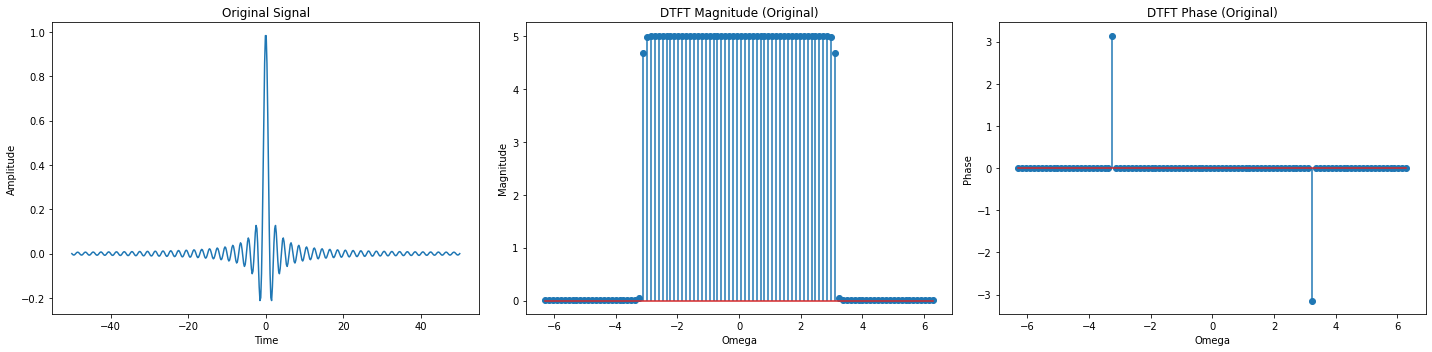

In [120]:
# let y(x) = sinc(x)
f_0 = 1 # maximum frequency component
time = np.linspace(-50, 50, 500)
x = np.sinc(time)

magnitude, phase, omega = DTFT_signal(x, time)

plots, figures = plt.subplots(1, 3, figsize=(20, 5))

figures[0].set_title("Original Signal")
figures[0].set(xlabel='Time', ylabel='Amplitude')
figures[0].plot(time, x)

figures[1].set_title("DTFT Magnitude (Original)")
figures[1].set(xlabel='Omega', ylabel='Magnitude')
figures[1].stem(omega, magnitude, use_line_collection = True)

figures[2].set_title("DTFT Phase (Original)")
figures[2].set(xlabel='Omega', ylabel='Phase')
figures[2].stem(omega, phase, use_line_collection = True)
plots.tight_layout()
plots.show()

Since we're dealing with a sine function, the `max frequency = fundamental frequency = 1/2*pi = f_0`

Thus, `omega_0 = 2 * pi * f_0 = 1`

Nyquist condition: `1/2*pi < 1/T or f_0 < f_s`

Now, we'll sample the signal at 
1. `f_s < f_0`
2. `f_s = f_0` 
3. `f_s > f_0`

As we can see, when sampling frequency is lower than the maximum frequency component, the aliasing increases drastically.


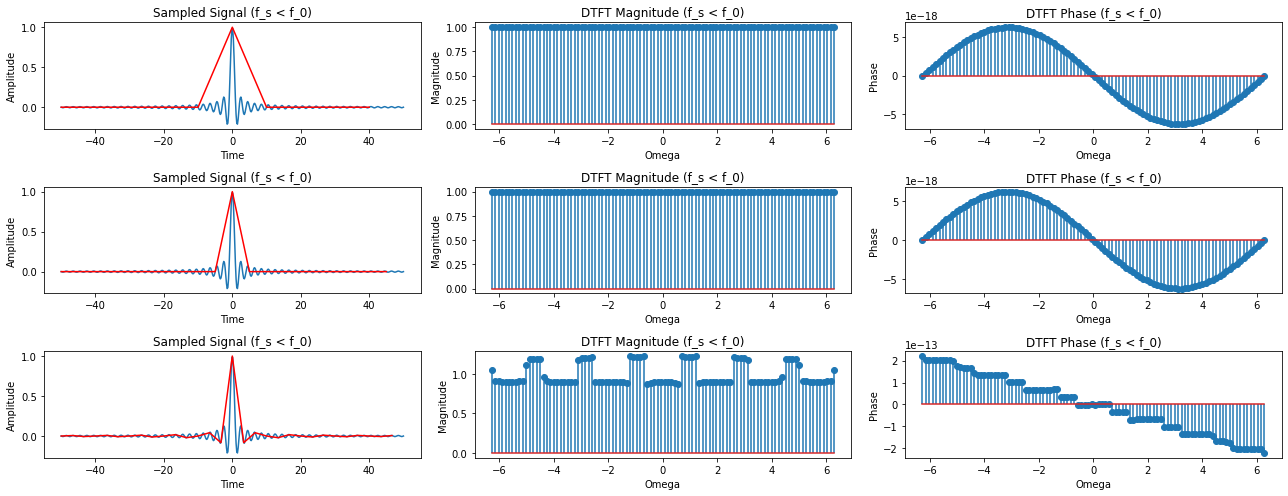

In [121]:
# Case 1: f_s < f_0
# f_s = f_0 / 10, f_0 / 5, 3 * f_0 / 10

plots_1, figures_1 = plt.subplots(3, 3, figsize=(18, 7))

for i in range(3):

  f_s = f_0 * ((i+1)/10)
  time_1 = np.arange(-50, 50, 1/(f_s))

  x_s1 = np.sinc(time_1)
  magnitude, phase, omega = DTFT_signal(x_s1, time_1)

  figures_1[i, 0].set(xlabel='Time', ylabel='Amplitude')
  figures_1[i, 0].plot(time, x)
  figures_1[i, 0].plot(time_1, x_s1, 'r')
  figures_1[i, 0].set_title("Sampled Signal (f_s < f_0)")

  figures_1[i, 1].set_title("DTFT Magnitude (f_s < f_0)")
  figures_1[i, 1].set(xlabel='Omega', ylabel='Magnitude')
  figures_1[i, 1].stem(omega, magnitude, use_line_collection = True)

  figures_1[i, 2].set_title("DTFT Phase (f_s < f_0)")
  figures_1[i, 2].set(xlabel='Omega', ylabel='Phase')
  figures_1[i, 2].stem(omega, phase, use_line_collection = True)


plots_1.tight_layout()
plots_1.show()

print("As we can see, when sampling frequency is lower than the maximum frequency component, the aliasing increases drastically.")

As we can see, when sampling frequency is the same as the maximum frequency component, aliasing starts to occur, 
and recoving the original signal by interpolation becomes rather difficult in most cases.


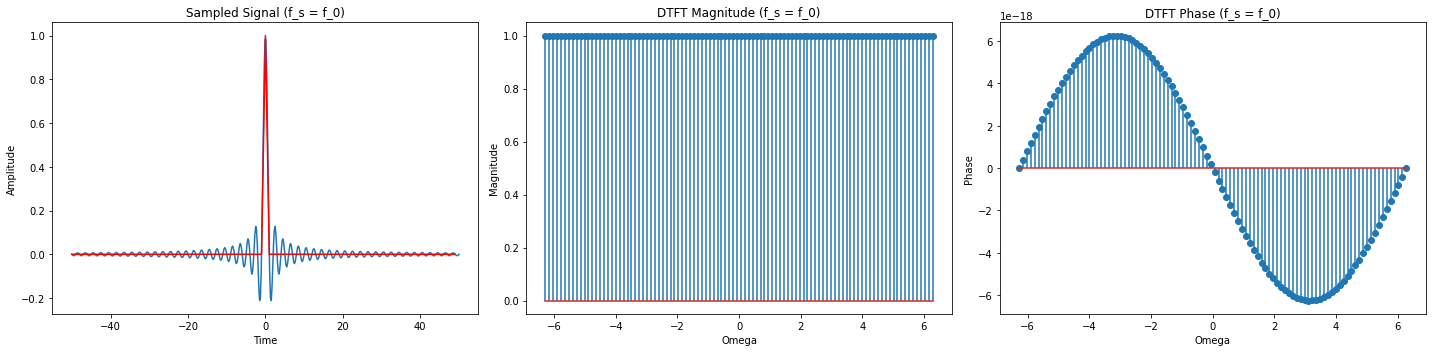

In [124]:
# Case 2: f_s = f_0

f_s = f_0

time_2 = np.arange(-50, 50, 1/(f_s))
x_s2 = np.sinc(time_2)
magnitude, phase, omega = DTFT_signal(x_s2, time_2)

plots, figures_2 = plt.subplots(1, 3, figsize=(20, 5))

figures_2[0].set(xlabel='Time', ylabel='Amplitude')
figures_2[0].plot(time, x)
figures_2[0].plot(time_2, x_s2, 'r')
figures_2[0].set_title("Sampled Signal (f_s = f_0)")

figures_2[1].set_title("DTFT Magnitude (f_s = f_0)")
figures_2[1].set(xlabel='Omega', ylabel='Magnitude')
figures_2[1].stem(omega, magnitude, use_line_collection = True)

figures_2[2].set_title("DTFT Phase (f_s = f_0)")
figures_2[2].set(xlabel='Omega', ylabel='Phase')
figures_2[2].stem(omega, phase, use_line_collection = True)

plots.tight_layout()
plots.show()

print("As we can see, when sampling frequency is the same as the maximum frequency component, aliasing starts to occur, \nand recoving the original signal by interpolation becomes rather difficult in most cases.")

As we can see, when sampling frequency is higher than the maximum frequency component, there is no aliasing whatsoever.


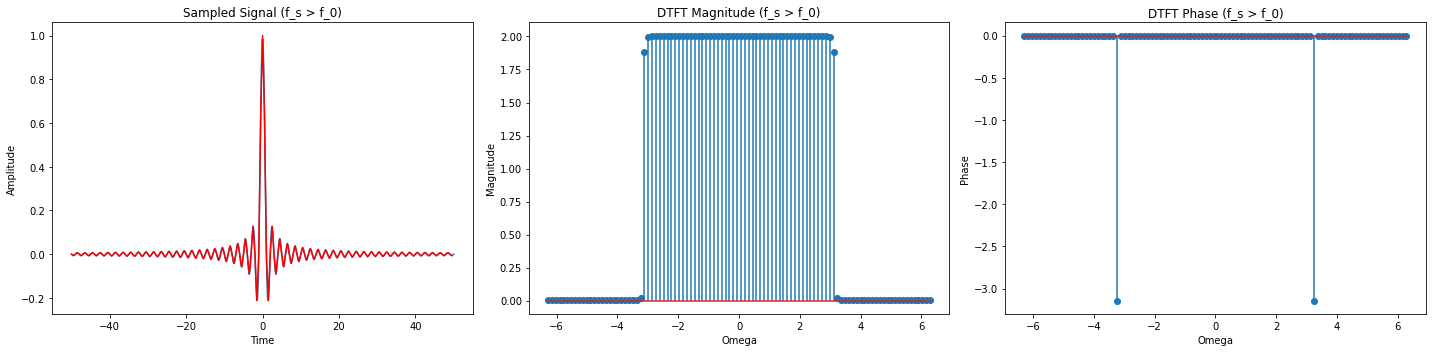

In [104]:
# Case 3: f_s > f_0

f_s = f_0 * 2
time_3 = np.arange(-50, 50, 1/(f_s))
x_s3 = np.sinc(time_3)
magnitude, phase, omega = DTFT_signal(x_s3, time_3)

plots, figures_3 = plt.subplots(1, 3, figsize=(20, 5))

figures_3[0].set(xlabel='Time', ylabel='Amplitude')
figures_3[0].plot(time, x)
figures_3[0].plot(time_3, x_s3, 'r')
figures_3[0].set_title("Sampled Signal (f_s > f_0)")

figures_3[1].set_title("DTFT Magnitude (f_s > f_0)")
figures_3[1].set(xlabel='Omega', ylabel='Magnitude')
figures_3[1].stem(omega, magnitude, use_line_collection = True)

figures_3[2].set_title("DTFT Phase (f_s > f_0)")
figures_3[2].set(xlabel='Omega', ylabel='Phase')
figures_3[2].stem(omega, phase, use_line_collection = True)

plots.tight_layout()
plots.show()

print("As we can see, when sampling frequency is higher than the maximum frequency component, there is no aliasing whatsoever.")

### Question 2

In [105]:
# function for plotting x[n], h[n], and the convolved signal
def plot_graphs(x, time_x, h, time_h, output, time_output):
  plots, graph = plt.subplots(1, 3, figsize=(17, 5))

  graph[0].set_title("x[n]")
  graph[0].set(xlabel='Time [n]', ylabel='Magnitude')
  graph[0].stem(time_x, x, use_line_collection = True)

  graph[1].set_title("h[n]")
  graph[1].set(xlabel='Time [n]', ylabel='Magnitude')
  graph[1].stem(time_h, h, use_line_collection = True)

  graph[2].set_title("x[n] * h[n]")
  graph[2].set(xlabel='Time [n]', ylabel='Magnitude')
  graph[2].stem(time_output, output, use_line_collection = True)

  plots.tight_layout()

In [106]:
# function for convolving a feature vector with a kernel
def convolve(input, kernel, time_x, time_h):
  input_size = input.size
  kernel_size = kernel.size

  # flipping the kernel
  kernel = np.flip(kernel)
  padding = kernel_size // 2
  output_size = int((input_size - kernel_size + 2 * padding) + 1)

  # padding the input array with zeros on both ends
  padded = np.zeros((input_size + padding * 2))
  # setting inner portion to the input array
  padded[padding:-1 * padding] = input

  output = np.zeros(output_size)
  time_output = np.arange(-int(output_size/2), int(output_size/2)+1)
  # filling the output array with the convolved values
  for i in range(output_size):
    output[i] = (kernel * padded[i:i + kernel_size]).sum()

  print("Input: ", input)
  print("Kernel: ", kernel)
  print("Output: ", output)


  plot_graphs(x, time_x, h, time_h, output, time_output)


##### (a) 
```
x[n] = 1 for 0 <= n <= 5, 0 otherwise
h[n] = delta[n]
```

Input:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
Kernel:  [0 1 0]
Output:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


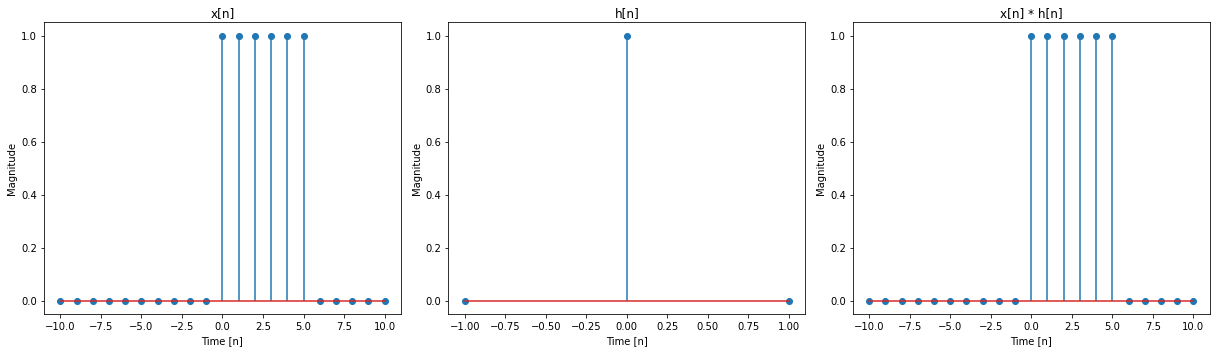

In [107]:
start_n = -10
# x = 1 for 0 <= n <= 5, 0 otherwise
x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
time_x = np.arange(start_n, x.size + start_n)
# h = delta
h = np.array([0, 1, 0])
time_h = np.arange(-1, h.size - 1)

convolve(x, h, time_x, time_h)

##### (b)
```
x[n] = 1 for 0 <= n <= 5, 0 otherwise
h[n] = x[n]
```

Input:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
Kernel:  [0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
Output:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 3. 4. 5. 6. 5. 4. 3. 2. 1.]


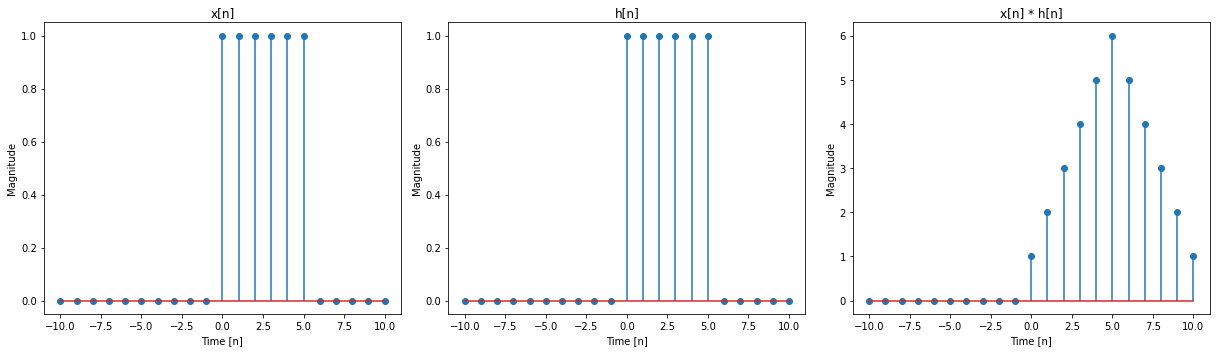

In [108]:
start_n = -10
# x = 1 for 0 <= n <= 5, 0 otherwise
x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
time_x = np.arange(start_n, x.size + start_n)
# h = delta
h = x
time_h = time_x

convolve(x, h, time_x, time_h)

##### (c)
```
x[n] = n for 0 <= n <= 5, 0 otherwise
h[n] = x[n]
```

Input:  [0 0 0 0 0 0 0 0 0 0 0 1 2 3 4 5 0 0 0 0 0]
Kernel:  [0 0 0 0 0 5 4 3 2 1 0 0 0 0 0 0 0 0 0 0 0]
Output:  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  4. 10. 20. 35. 44.
 46. 40. 25.]


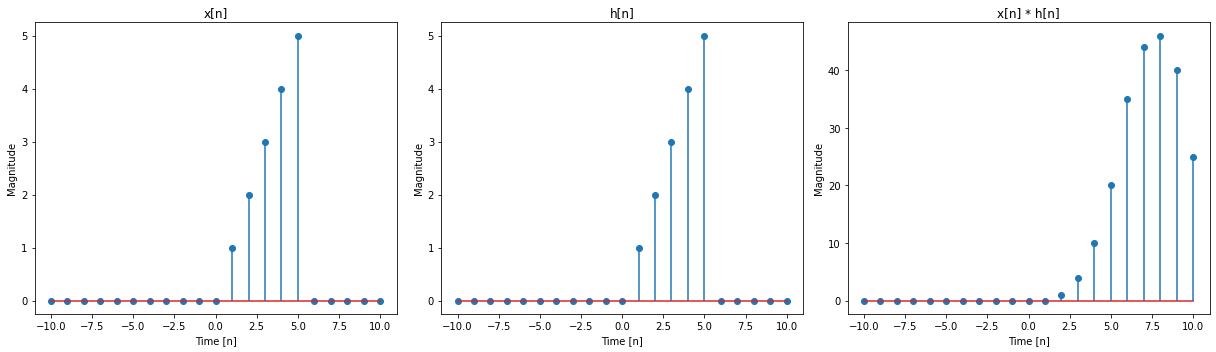

In [109]:
start_n = -10
# x = 1 for 0 <= n <= 5, 0 otherwise
x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0])
time_x = np.arange(start_n, x.size + start_n)
# h = delta
h = x
time_h = time_x

convolve(x, h, time_x, time_h)

##### (d)
```
x[n] = 1 for 0 <= n <= 5, 0 otherwise
h = 0.5 * delta[n] - 0.5 * delta[n - 1]
```

Input:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
Kernel:  [ 0.   0.  -0.5  0.5  0.   0.   0. ]
Output:  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.
  0.   0.  -0.5  0.   0.   0.   0. ]


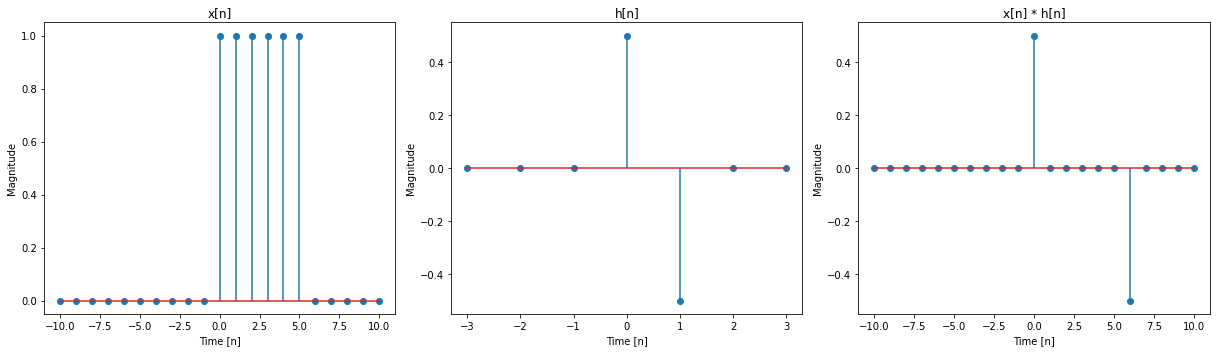

In [110]:
start_n = -10
# x = 1 for 0 <= n <= 5, 0 otherwise
x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])
time_x = np.arange(start_n, x.size + start_n)
# h = 0.5 * delta[n] - 0.5 * delta[n - 1]
h_1 = np.array([0, 0, 0, 1, 0, 0, 0]) # delta[n]
h_2 = np.array([0, 0, 0, 0, 1, 0, 0]) # delta[n - 1]
h = 0.5 * h_1 - 0.5 * h_2
time_h = np.arange(-3, h.size - 3)

convolve(x, h, time_x, time_h)

##### (e)
```
x[n] = cos(pi*n) for 0 <= n <= 5, 0 otherwise
h = 0.5 * delta[n] + 0.5 * delta[n - 1]
```

Input:  [ 0  0  0  0  0  0  0  0  0  0  1 -1  1 -1  1 -1  0  0  0  0  0]
Kernel:  [0.  0.  0.5 0.5 0.  0.  0. ]
Output:  [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.5  0.   0.   0.
  0.   0.  -0.5  0.   0.   0.   0. ]


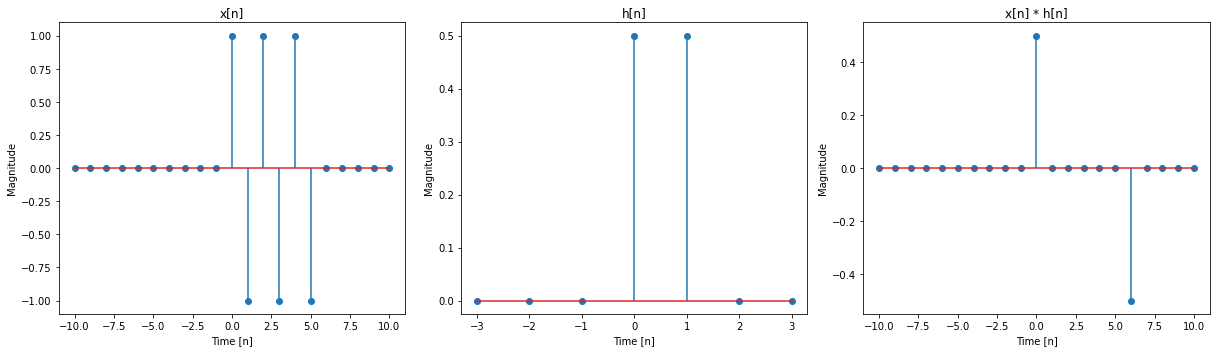

In [111]:
start_n = -10
# x = 1 for 0 <= n <= 5, 0 otherwise
x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 0, 0, 0, 0, 0])
x[10:16] = np.cos(np.pi * x[10:16])
time_x = np.arange(start_n, x.size + start_n)

# h = 0.5 * delta[n] + 0.5 * delta[n - 1]
h_1 = np.array([0, 0, 0, 1, 0, 0, 0]) # delta[n]
h_2 = np.array([0, 0, 0, 0, 1, 0, 0]) # delta[n - 1]
h = 0.5 * h_1 + 0.5 * h_2
time_h = np.arange(-3, h.size - 3)

convolve(x, h, time_x, time_h)

### Question 3

In [112]:
# function for convolving a feature vector with a kernel
def convolve_audio(input, kernel, audio_name):
  # converting all arrays to float16 so as to not loose any information due to type casting
  input = np.float16(input)
  kernel = np.float16(kernel)

  #converting
  input_size = input.size
  kernel_size = kernel.size

  # flipping the kernel
  kernel = np.flip(kernel)
  padding = kernel_size // 2
  output_size = int((input_size - kernel_size + 2 * padding) + 1)

  # padding the input array with zeros on both ends
  padded = np.zeros((input_size + padding * 2))
  # setting inner portion to the input array
  padded[padding:-1 * padding] = input

  output = np.zeros(output_size)
  output = np.float16(output)
  # filling the output array with the convolved values
  for i in range(output_size):
    output[i] = (kernel * padded[i:i + kernel_size]).sum()

  # converting the output to uint8 format so no information is lost due to change in size
  # essentially, scaling everything down from float16 to uint8 because that's how data is stored in .wav files
  # this particular line of code was adapted from a stackoverflow article
  output = np.uint8(output/np.max(np.abs(output)) * 256)

  print("Clip:", audio_name)
  print("Input: ", input)
  print("Kernel: ", kernel)
  print("Output: ", output)
  # writing the convolved audio to another .wav file
  convolved_audio = wave.open("convolved_" + str(audio_name), "w")
  convolved_audio.setnchannels(1)
  convolved_audio.setsampwidth(1)
  convolved_audio.setframerate(output_size)
  convolved_audio.writeframes(output)
  # playsound(convolved_audio)
  convolved_audio.close()



In [113]:
# function to read an audio file and return I second worth of samples
def read_wav(audio):
  read_audio = wave.open(audio, "r")
  audio_file = read_audio.readframes(-1)
  audio_file = np.frombuffer(audio_file, dtype=np.uint8)
  framerate = read_audio.getframerate()
  read_audio.close()

  return audio_file[0:framerate]

##### (a) ```h[n] = 0.33 * delta[n] + 0.33 * delta[n - 1] + 0.33 * delta[n - 2]```

In [114]:
# h = 0.33 * delta[n] + 0.33 * delta[n - 1] + 0.33 * delta[n-2]
h_1 = np.array([0, 0, 1, 0, 0]) # delta[n]
h_2 = np.array([0, 0, 0, 1, 0]) # delta[n - 1]
h_3 = np.array([0, 0, 0, 0, 1]) # delta[n - 2]
h = 0.33 * h_1 + 0.33 * h_2 + 0.33 * h_3

for i in audio_files:
  x = read_wav(i)
  convolve_audio(x, h, "a_" + i)

Clip: a_alarm.wav
Input:  [127. 127. 127. ... 127. 127. 127.]
Kernel:  [0.33 0.33 0.33 0.   0.  ]
Output:  [ 65 131 197 ... 197 197 197]
Clip: a_armageddon.wav
Input:  [121. 121. 126. ...  67.  58.  51.]
Kernel:  [0.33 0.33 0.33 0.   0.  ]
Output:  [ 40  81 123 ...  72  64  58]
Clip: a_cry.wav
Input:  [129. 129. 129. ... 129. 128. 128.]
Kernel:  [0.33 0.33 0.33 0.   0.  ]
Output:  [ 54 109 163 ... 163 163 162]
Clip: a_wow.wav
Input:  [128. 128. 130. ... 129. 143. 140.]
Kernel:  [0.33 0.33 0.33 0.   0.  ]
Output:  [ 53 106 160 ... 147 159 171]


##### (b) ```h[n] = -0.25 * delta[n] + 0.5 * delta[n - 1] - 0.25 * delta[n - 2]```

In [115]:
# h = -0.25 * delta[n] + 0.5 * delta[n - 1] - 0.25 * delta[n - 2]
h_1 = np.array([0, 0, 1, 0, 0]) # delta[n]
h_2 = np.array([0, 0, 0, 1, 0]) # delta[n - 1]
h_3 = np.array([0, 0, 0, 0, 1]) # delta[n - 2]
h = -0.25 * h_1 + 0.50 * h_2 - 0.25 * h_3

for i in audio_files:
  x = read_wav(i)
  convolve_audio(x, h, "b_" + i)

Clip: b_alarm.wav
Input:  [127. 127. 127. ... 127. 127. 127.]
Kernel:  [-0.25  0.5  -0.25  0.    0.  ]
Output:  [175  81   0 ...   0   0   0]
Clip: b_armageddon.wav
Input:  [121. 121. 126. ...  67.  58.  51.]
Kernel:  [-0.25  0.5  -0.25  0.    0.  ]
Output:  [  0   0 246 ... 237  14 252]
Clip: b_cry.wav
Input:  [129. 129. 129. ... 129. 128. 128.]
Kernel:  [-0.25  0.5  -0.25  0.    0.  ]
Output:  [ 21 235   0 ...   1   1 255]
Clip: b_wow.wav
Input:  [128. 128. 130. ... 129. 143. 140.]
Kernel:  [-0.25  0.5  -0.25  0.    0.  ]
Output:  [159  97 255 ... 238   3  12]


In [116]:
print("The first set of convolved signals (a) seem to muffle the original signal, and makes it slightly less noisy, \nwhereas the second set of convolved signals (b) make the original clips a lot more noisier.")
print("Based on these observations, it appears as though each kernel has the same type of effect on different audio clips \n(i.e. either making it slightly muffled (a) or much noisier (b)).")
print("Thus, the kernel in part (a) is one that muffles sounds, and the one in (b) makes every clip very noisy.")

The first set of convolved signals (a) seem to muffle the original signal, and makes it slightly less noisy, 
whereas the second set of convolved signals (b) make the original clips a lot more noisier.
Based on these observations, it appears as though each kernel has the same type of effect on different audio clips 
(i.e. either making it slightly muffled (a) or much noisier (b)).
Thus, the kernel in part (a) is one that muffles sounds, and the one in (b) makes every clip very noisy.
